<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Classification/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the necessary libraries:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score


load the dataset:

In [2]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)


Split the dataset into inputs (X) and the target output (y), then into a training set and test set:

In [3]:
X = data.drop(columns="Class")  # assuming "Class" is the target to predict
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Random Forest model:

In [4]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now make predictions and print the classification report:

In [5]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("AUC ROC score: ", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUC ROC score:  0.8928307641289491


Basic Data Analysis: We'll start by looking at the basic structure of the dataset.

In [6]:
# Print the first 5 rows of the dataframe
print(data.head())

# Print the summary statistics
print(data.describe())

# Count the occurrences of fraud and no fraud cases
print(data['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Visualizing the imbalanced class distribution: This will give you a sense of how imbalanced the classes are.

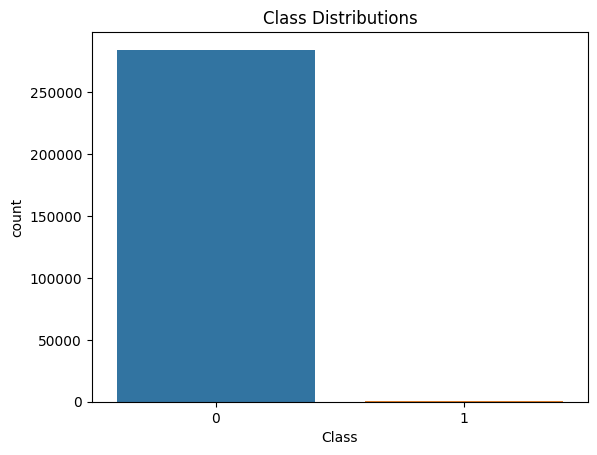

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='Class')
plt.title('Class Distributions')
plt.show()


Correlation Matrix: A correlation matrix can be used to see the correlation between different features in the dataset.

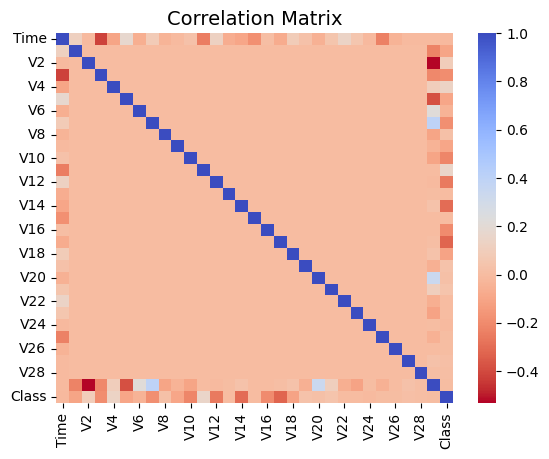

In [8]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix", fontsize=14)
plt.show()


Histogram of each feature: This can be useful to understand the distribution of values in each feature.

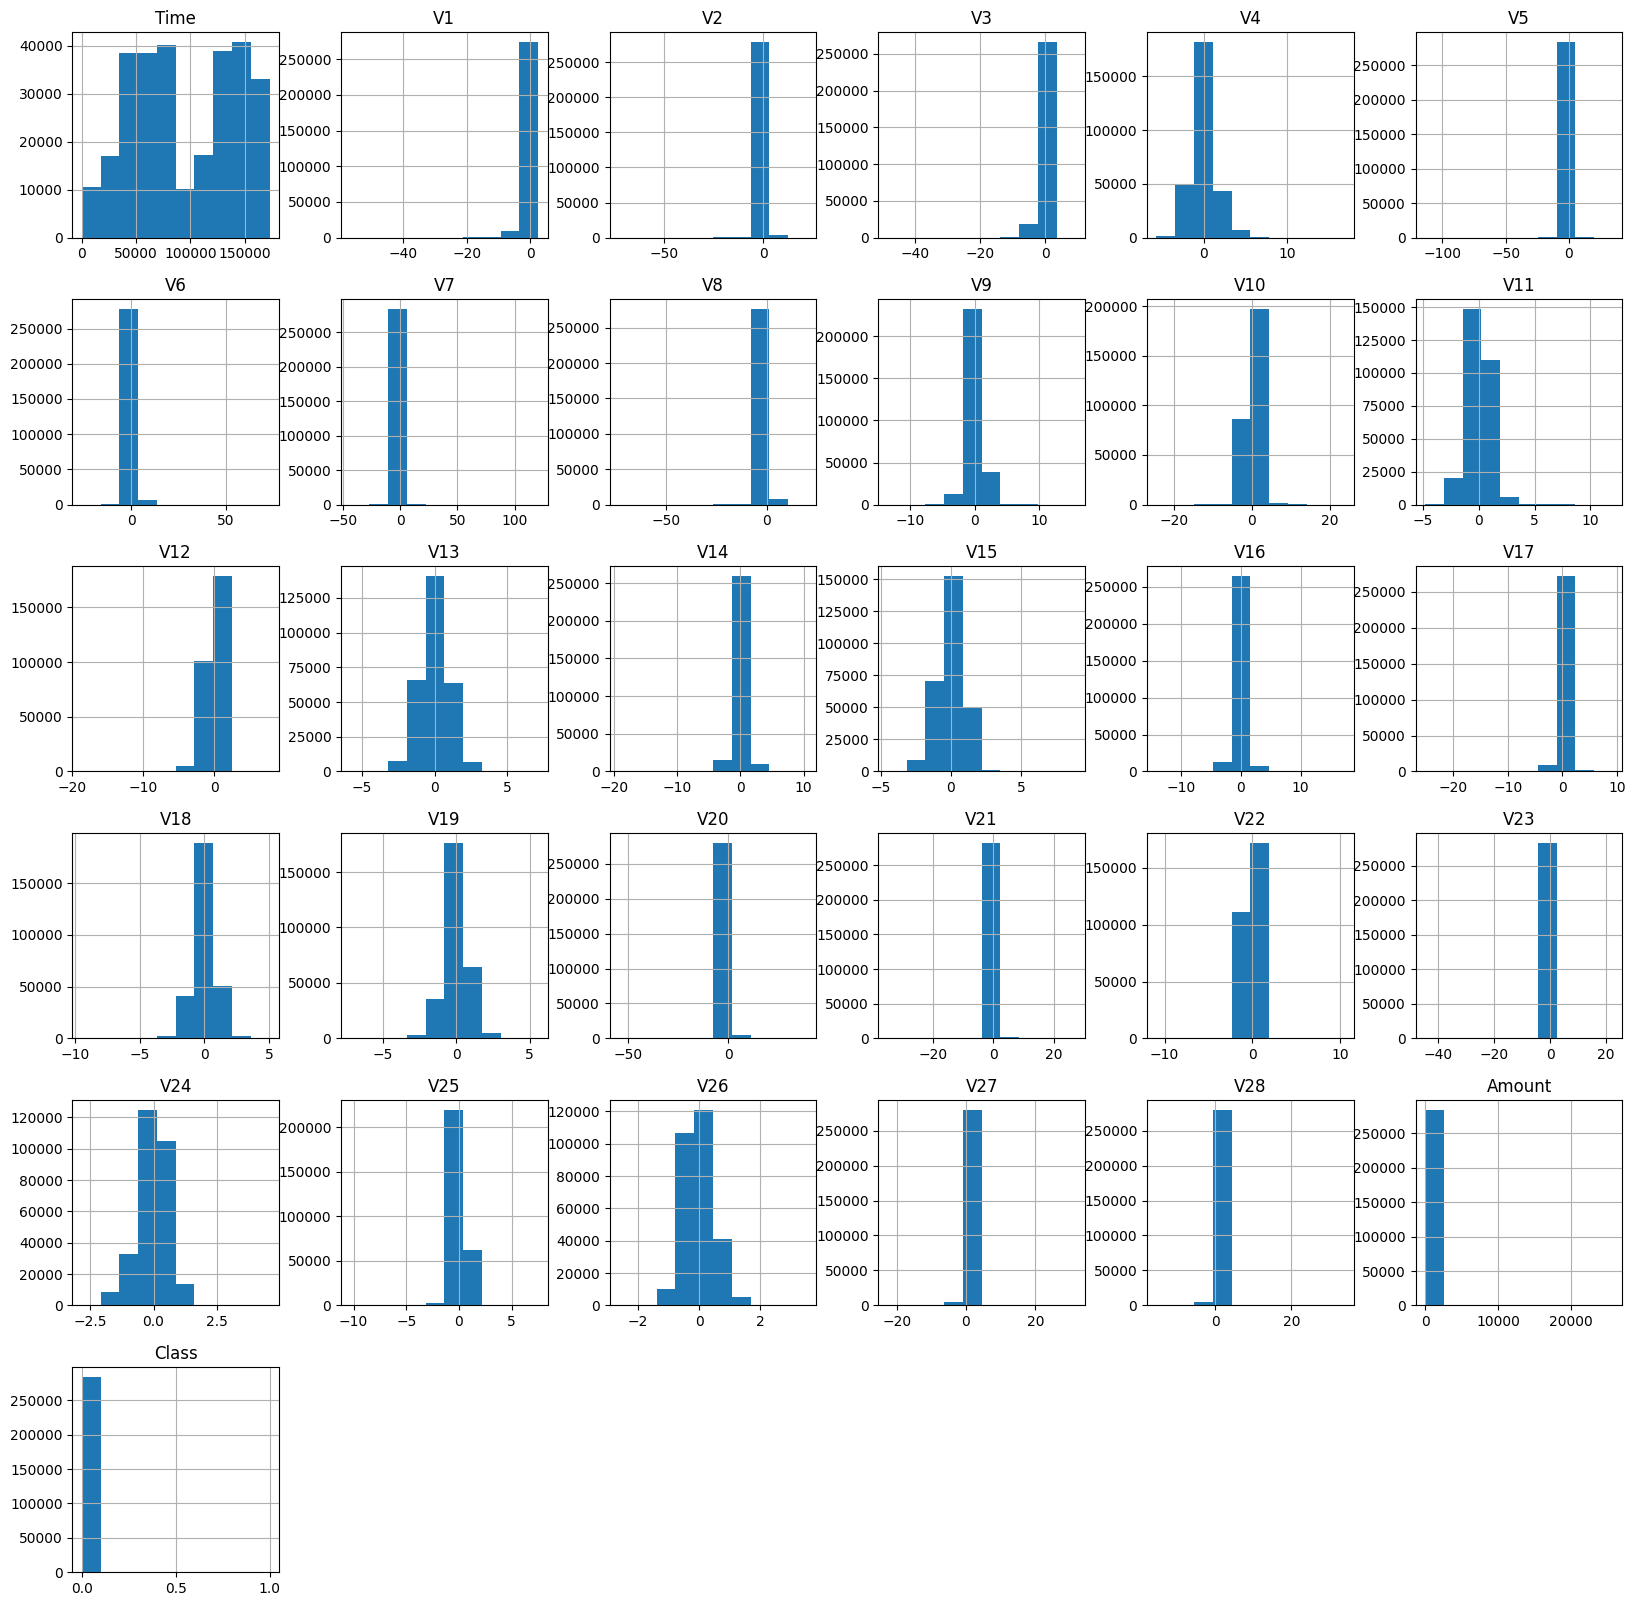

In [9]:
data.hist(figsize=(20,20))
plt.show()


Analyzing performance with ROC curve:

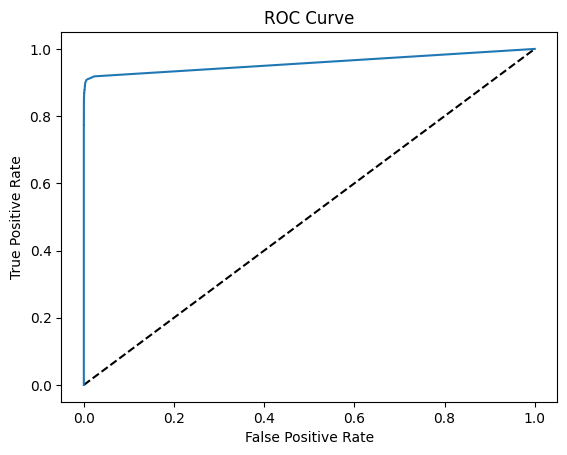

In [10]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
